In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

In [5]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species, dtype=int)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [9]:
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, test_size=0.3)

In [18]:
# callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.9):
            print("\nAkurasi telah mencapai 90%")
            self.model.stop_training = True
callbacks = myCallback()

In [16]:
# define model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(4,)),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')
])

# compile model
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
# train model
hist = model.fit(X_train, Y_train, epochs=100, callbacks=callbacks)

Epoch 1/100


I0000 00:00:1720691872.181327   47078 service.cc:145] XLA service 0x7f0a64009960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720691872.181611   47078 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-07-11 16:57:52.279209: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-11 16:57:52.608952: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.2812 - loss: 1.3796

I0000 00:00:1720691875.391215   47078 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 775ms/step - accuracy: 0.3437 - loss: 1.3232
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4509 - loss: 1.0709 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5883 - loss: 0.9088 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 0.9462 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 0.9158 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6590 - loss: 0.7640 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.7606 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6861 - loss: 0.7274 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7319 - loss: 0.6478 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7665 - loss: 0.5813 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.5857 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7877 - loss: 0.5429 


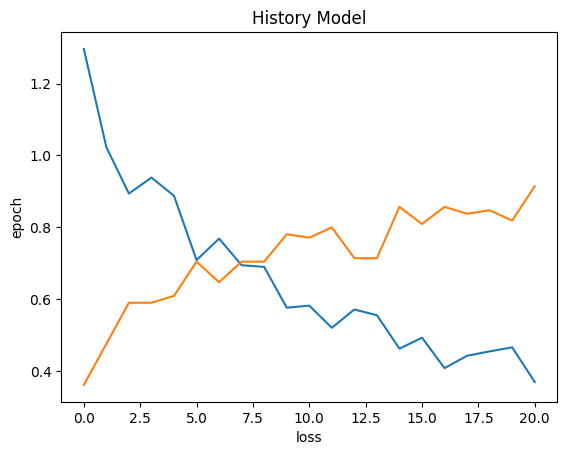

In [24]:
from matplotlib import pyplot as plt

plt.title("History Model")
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlabel('loss')
plt.ylabel('epoch')
plt.show()